## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [43]:
df = pd.read_csv('QueryResults.csv')
df.columns = ['DATE', 'TAG', 'POSTS']

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [44]:
df.head()
# df.tail()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [45]:
df.shape

(2691, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [46]:
df.count()

,0
DATE,2691
TAG,2691
POSTS,2691


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [47]:
df[['TAG', 'POSTS']].groupby('TAG').sum().sort_values('POSTS', ascending=False)

,POSTS
TAG,
javascript,2531097
python,2205193
java,1917722
c#,1620967
php,1467071
c++,810734
r,508773
c,406092
swift,335070


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [48]:
df.groupby('TAG').count().sort_values('DATE', ascending=True)

,DATE,POSTS
TAG,,
go,179,179
swift,185,185
r,192,192
assembly,194,194
c,194,194
c++,194,194
delphi,194,194
java,194,194
javascript,194,194


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [49]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [50]:
type(df['DATE'][1])
# to datetime
type(pd.to_datetime(df['DATE'][1]))
print(pd.to_datetime(df['DATE'][1]))

2008-08-01 00:00:00


In [51]:
# Converting whole column to datetime object
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [52]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2024-05-01,178.0,658.0,2462.0,1416.0,101.0,268.0,2246.0,3950.0,38.0,1149.0,6849.0,1373.0,117.0,609.0
2024-06-01,86.0,532.0,1932.0,1060.0,67.0,223.0,1670.0,2934.0,29.0,946.0,5039.0,1085.0,109.0,575.0
2024-07-01,91.0,557.0,2096.0,1130.0,54.0,250.0,1531.0,2898.0,34.0,867.0,5240.0,1057.0,94.0,577.0
2024-08-01,115.0,483.0,1861.0,1033.0,84.0,210.0,1219.0,2526.0,42.0,813.0,4557.0,881.0,106.0,549.0
2024-09-01,87.0,448.0,1584.0,1008.0,67.0,161.0,1306.0,2201.0,26.0,625.0,3780.0,760.0,84.0,524.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [53]:
reshaped_df.shape

(195, 14)

In [54]:
print(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')


In [55]:
print(reshaped_df.head())

TAG         assembly      c      c#    c++  delphi  go    java  javascript  \
DATE                                                                         
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN   
2008-08-01       8.0   82.0   503.0  164.0    13.0 NaN   221.0       160.0   
2008-09-01      28.0  320.0  1640.0  753.0   104.0 NaN  1123.0       633.0   
2008-10-01      16.0  303.0  1985.0  805.0   112.0 NaN  1146.0       721.0   
2008-11-01      16.0  258.0  1729.0  733.0   139.0 NaN   954.0       581.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  157.0   119.0  NaN   68.0    NaN  
2008-09-01  130.0  474.0   535.0  6.0  286.0    NaN  
2008-10-01  128.0  604.0   505.0  NaN  246.0    NaN  
2008-11-01   97.0  497.0   447.0  1.0  154.0    NaN  


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [56]:
reshaped_df.count()
reshaped_df.sum()

,0
TAG,
assembly,44735.0
c,406092.0
c#,1620967.0
c++,810734.0
delphi,52166.0
go,73767.0
java,1917722.0
javascript,2531097.0
perl,68221.0


In [57]:
reshaped_df = reshaped_df.fillna(0)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,221.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1640.0,753.0,104.0,0.0,1123.0,633.0,130.0,474.0,535.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1985.0,805.0,112.0,0.0,1146.0,721.0,128.0,604.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,954.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


In [58]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

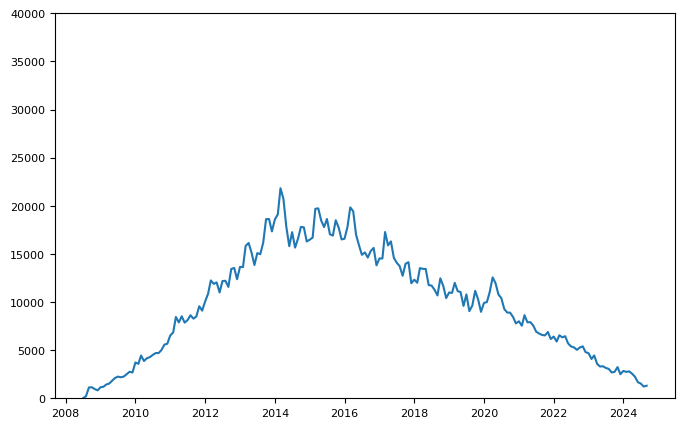

In [59]:
plt.figure(figsize=(8, 5))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(0, 40000)
plt.plot(reshaped_df.index, reshaped_df.java) # (x, y)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

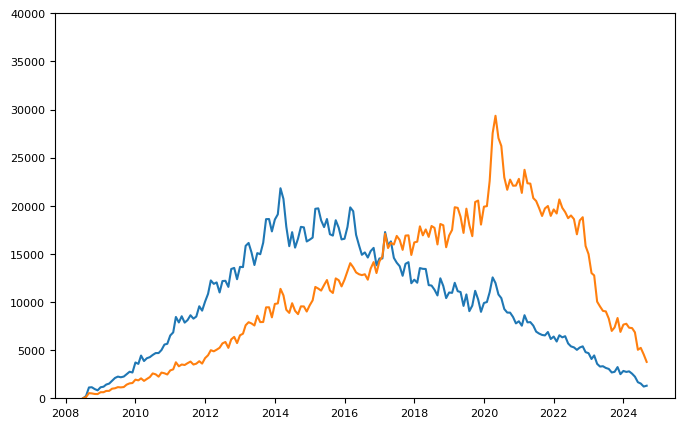

In [62]:
plt.figure(figsize=(8, 5))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(0, 40000)
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

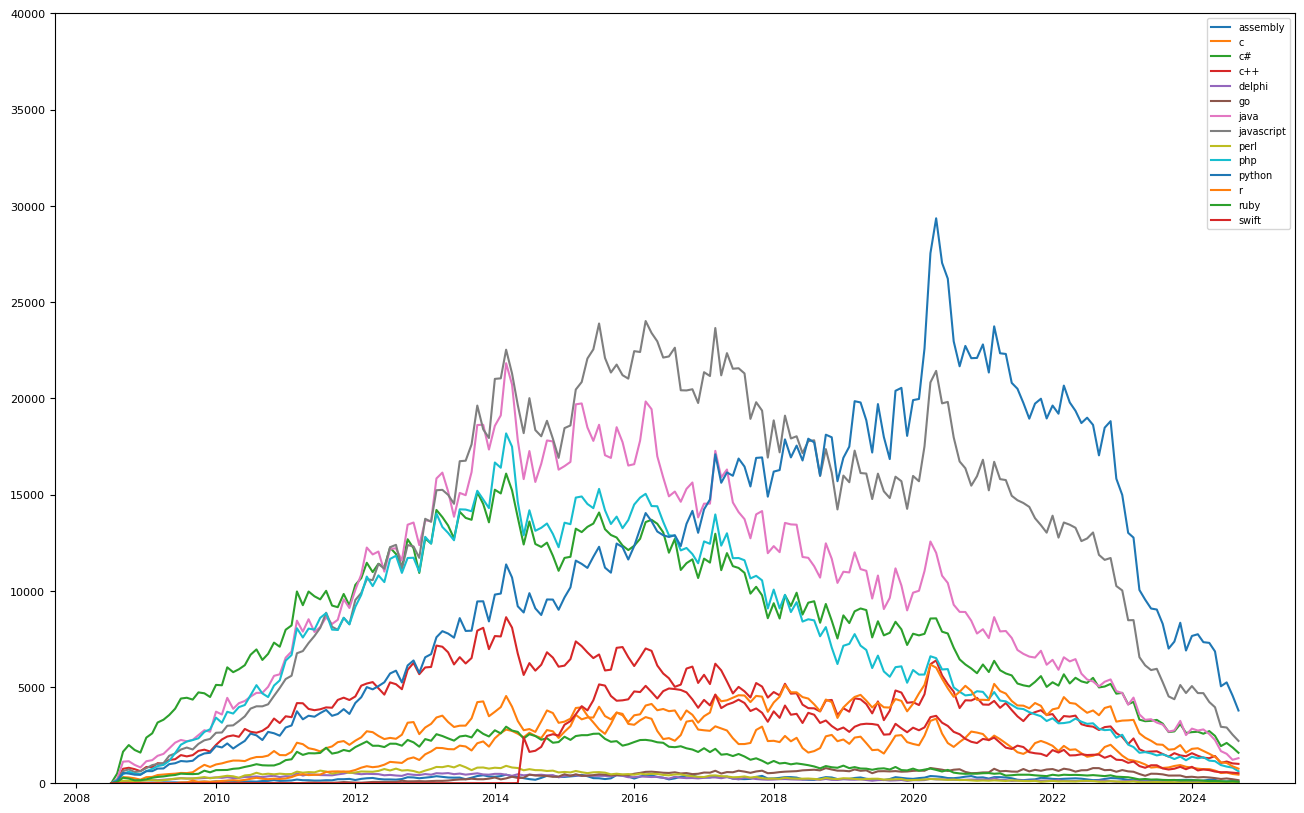

In [66]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(0, 40000)

# Making chart for all programming languages
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], label=column)

plt.legend(fontsize=7)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

In [73]:
# roll df
rolled_df = reshaped_df.rolling(window=5).mean()

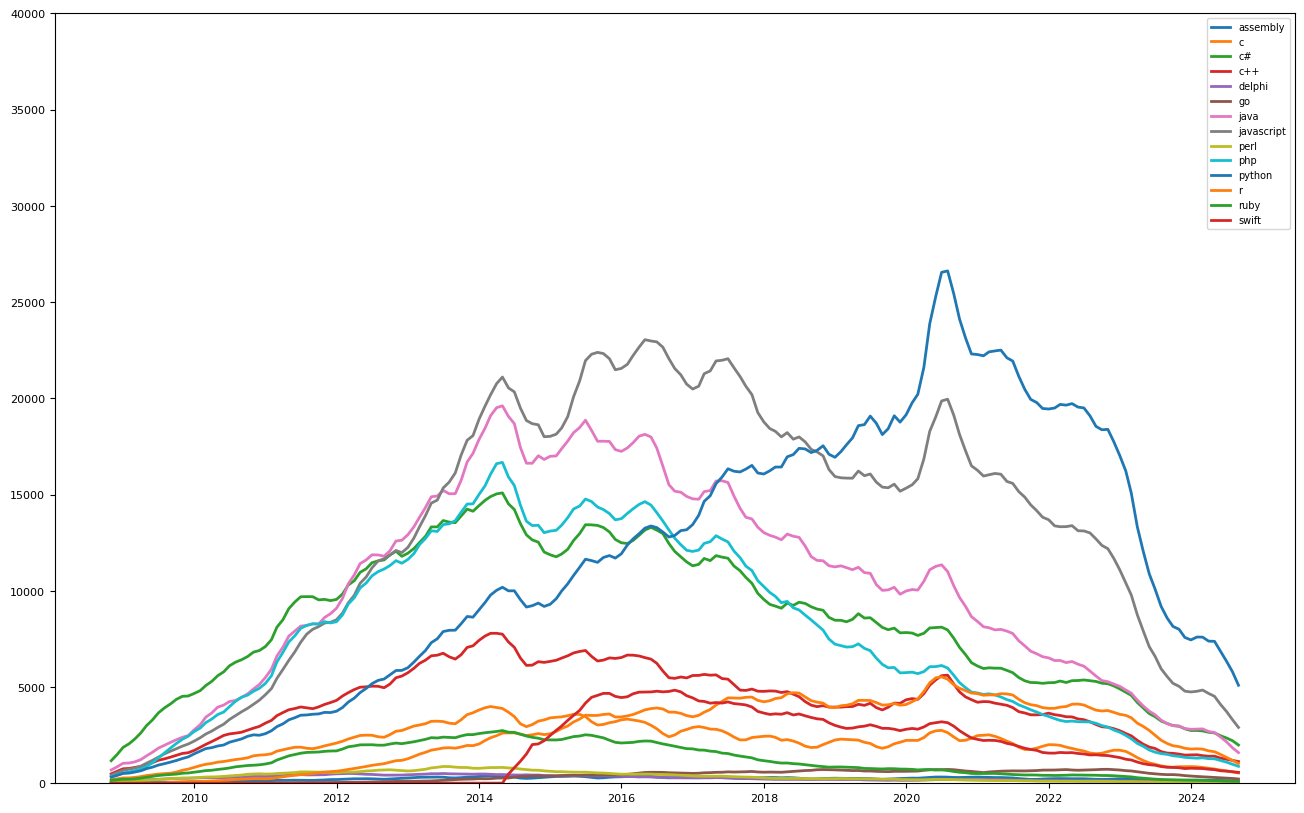

In [74]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(0, 40000)

# Making chart for all languages
for column in rolled_df.columns:
  plt.plot(rolled_df.index, rolled_df[column], linewidth=2, label=column)

plt.legend(fontsize=7)